# HUMANOO Case Study Report- Masoud Azizimotlagh

## Import libraries

In [3]:
import pandas as pd
import duckdb

## Make connection to the database

In [21]:
db_path = '.\humanoo_dbt\dev.duckdb'
conn = duckdb.connect(database=db_path)

### Question 1: Show the daily average number of steps for all the users, accross all days An example of the expected outcome: 10.000


In [36]:
df = conn.sql('select * from main.daily_avg_steps').df()

# df['activity_date'] = pd.to_datetime(df['activity_date'])
df.set_index('activity_date', inplace=True)
df.plot(x=df.index, y='avg_steps', kind='line', marker='o', linestyle='-', color='b')

KeyError: "None of [Index(['2023-11-15', '2023-11-20', '2023-11-03', '2023-11-05', '2023-11-21',\n       '2023-11-04', '2023-11-06', '2023-11-17', '2023-11-18', '2023-11-19',\n       '2023-11-22', '2023-11-10', '2023-11-12', '2023-11-02', '2023-11-08',\n       '2023-11-11', '2023-11-16', '2023-11-01', '2023-11-07', '2023-11-09',\n       '2023-11-13', '2023-11-14'],\n      dtype='object', name='activity_date')] are in the [columns]"

In [33]:
df

,activity_date,avg_steps
0,2023-11-15,10006.575758
1,2023-11-20,9439.760000
2,2023-11-03,9455.063830
3,2023-11-05,7140.030928
4,2023-11-21,8850.574257
5,2023-11-04,8091.729167
6,2023-11-06,9538.663265
7,2023-11-17,9241.410000
8,2023-11-18,8963.060606
9,2023-11-19,7547.797980


### Question 2: Show per "Company Name" amount of users and calculate % of how many users have steps data


<Axes: >

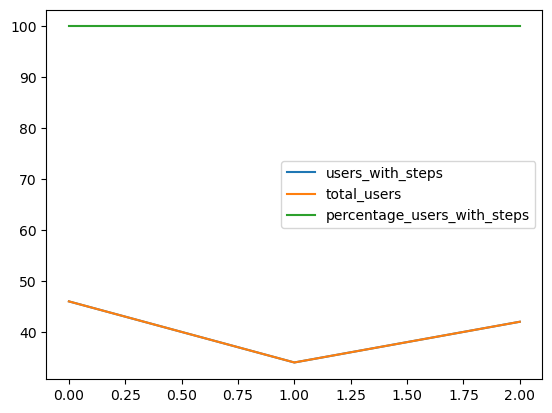

In [26]:
conn.sql('select * from main.company_user_stats').df().plot()

### Question 3: Show the top 10 and bottom 10 users with the most (and least) steps collect in any day Output should be for both top & bottom: "User Name" and "Number of Steps"


In [28]:
conn.sql('select * from main.top_bottom_users').df()

,user_name,total_steps
0,Jessica,503476.0
1,lotte,423881.0
2,Marion,384502.0
3,Susie,356147.0
4,Loïc,327647.0
5,moharita,323749.0
6,Johannes,302494.0
7,Steve,298990.0
8,Bastet,291612.0
9,cami,285359.0
